In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patheffects as pe
import os
import numpy as np
import re
from scipy.optimize import curve_fit

In [2]:
from plotter import load_vector, load_3D_vector

Energy:
O_tmax = -0.7885418666666674, with t_eq: 2000 and t_max: 8000
${S_{tmax}}^2 = 0.440$ 
Magnetization:
O_tmax = -0.0018394666666666777, with t_eq: 2000 and t_max: 8000
${S_{tmax}}^2 = 1.246$ 


In [3]:
T_c = 2.269185
T = 3.000000
L = 25
sweeps = 10000
filepath = "./data/T={:.6f}/".format(T)
filename_t = "timesteps_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_spins = "saved_spin_values_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

# Energy and Magnetization plots

In [20]:
sweeps = 10000
Ts = [1.000000, T_c, 3.00000]
filename_t = "timesteps_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_spins = "saved_spin_values_L="+str(L)+"_sweeps="+str(sweeps)+".txt"

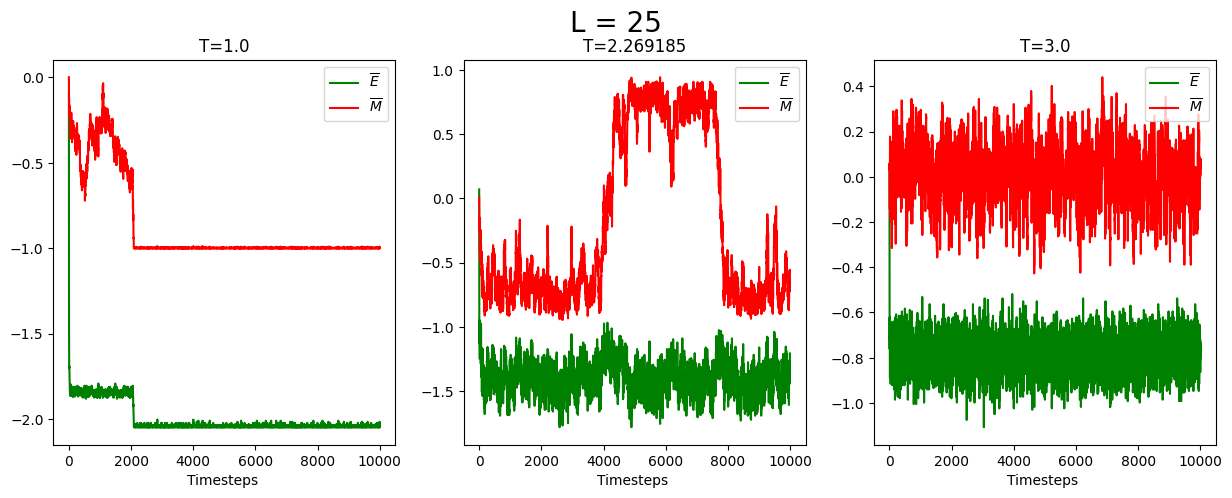

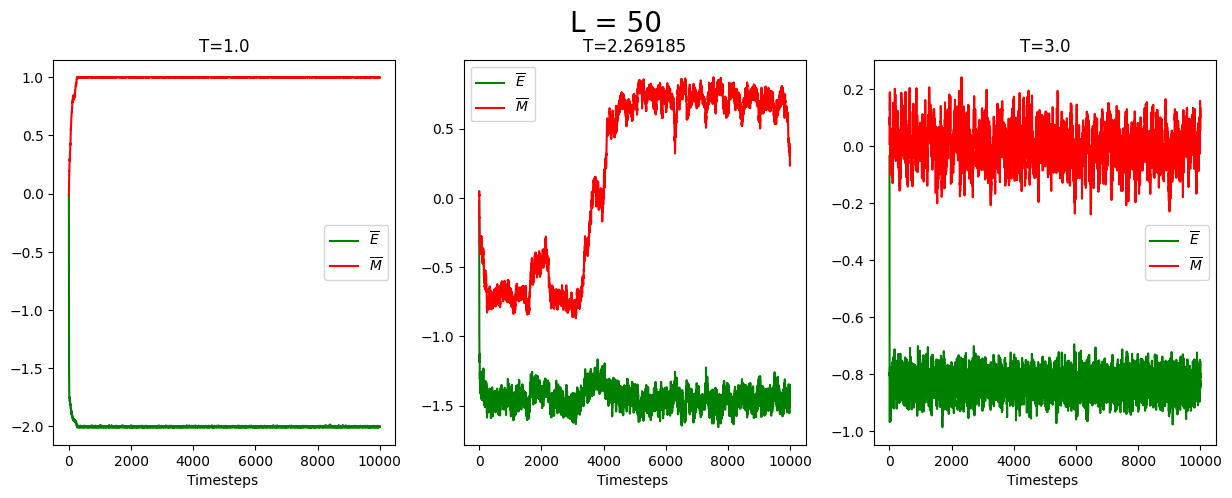

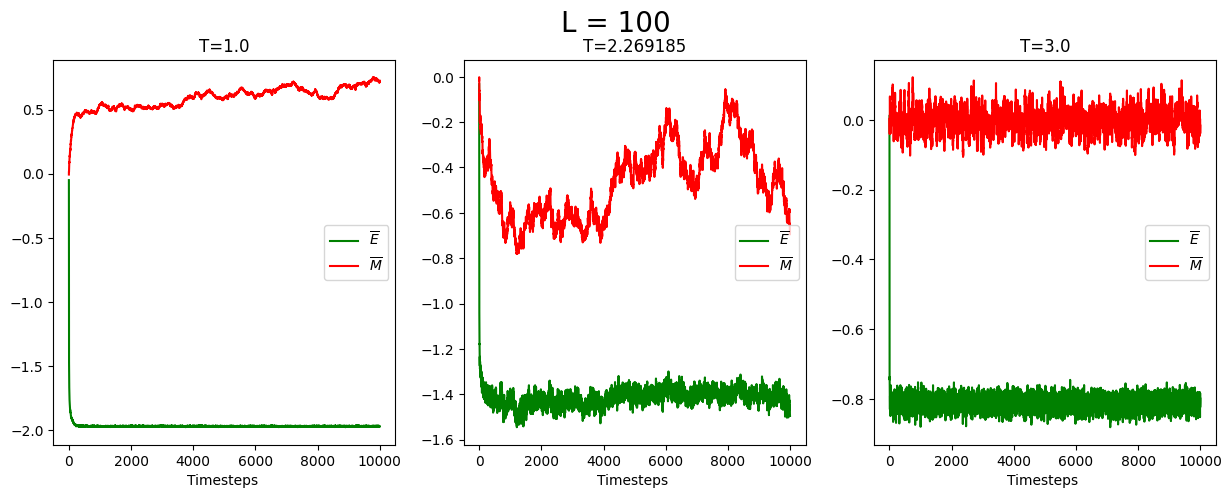

In [31]:
 # Create a plot of energy vs. timesteps
Ls = [25,50,100]
for L in Ls:
    filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
    fig,axes = plt.subplots(1,3)
    for i in range(len(axes)):
        T = Ts[i]
        filepath = "./data/T={:.6f}/".format(T)
        timesteps = np.array(load_vector(filepath + filename_t))
        energies =  np.array(load_vector(filepath + filename_E))
        magnetizations = np.array(load_vector(filepath + filename_M))
        N = L**2
        avg_energies = energies/N
        avg_magnetization = magnetizations/N
        axes[i].plot(timesteps, avg_energies, linestyle='-', color='g', label=r'$\overline{E}$')
        axes[i].plot(timesteps, avg_magnetization, linestyle='-', color='r', label=r'$\overline{M}$')

        # Add labels and a legend
        axes[i].set_xlabel('Timesteps ')
        axes[i].set_title('T='+str(T))
        axes[i].legend()
    fig.suptitle(f"L = {L}", size=20)
    fig.set_size_inches(15,5)


### Equilibrium Times
#### L=25
For T=1, the system clearly hits equilibrium just around 2000 Monte Carlo sweeps (timesteps), while for T=$T_c$, the systems seems to be in equilibrium pretty early, but hits a metastable state around 4000-8000 sweeps. For the high temperature, T=3, the system hits equilibrium right away, with thermal fluctuations dominating, making the spins never settling between -1 or 1.
#### L=50
For T=1, the system hits equilibrium after some hundred sweeps, while for T=$T_c$, the system struggles to hit a stable phase, and somwhat resembles the pattern for L=25, with the system switching between metastable phases. For T=3, the system hits equilibriums straight away, as for the previous case with less spins.
#### L=100
The system doesn't clearly hit an equilibrium as in the two previos spin cases, but as we can see from the energy and low fluctuations in magnetization, it seems to have hit a pretty stable phase. For T=$T_c$, this system also struggle to find equilibrium, and fluctuates alot in magnetizations, but has hit a pretty stable phase in terms of energy. The high temperature is pretty similar to the two previous spin cases, both in regards to magnetization and energy.

In [ ]:
#Make table of equilibrium times

## Averages and fluctuations

In [30]:
sweeps = 10000
Ts = [1.000000, T_c, 3.00000]
filename_E = "energies_L="+str(L)+"_sweeps="+str(sweeps)+".txt"
filename_M = "magnetizations_L="+str(L)+"_sweeps="+str(sweeps)+".txt"


In [35]:
def print_observables(filepath, filename_E, filename_M, T, L, save=False):
    t_eq = 4500
    energies =  np.array(load_vector(filepath + filename_E))[t_eq:]
    magnetizations = np.array(load_vector(filepath + filename_M))[t_eq:] #Cutting of data before equilibrium

    kb = 1
    # int_values = [match.group() for match in re.finditer(r'\d+', filepath + filename_E)] #Saving L value in filename to take averages
    # T = float(int_values[0] + "." + int_values[1])

    average_enery = sum(energies)/len(energies)
    average_enery_squared = sum(energies**2)/len(energies)
    average_mag = sum(magnetizations)/len(magnetizations)
    average_mag_squared = sum(magnetizations**2)/len(magnetizations)

    Cv = (average_enery_squared - average_enery**2)/(kb*T**2*L**2) #Skal jeg ha L**2?
    Nxt = (average_mag_squared - average_mag**2)/(kb*T*len(magnetizations))
    print("Results for L=", L, " and T=", T, ":")
    print("-----------------------------------")
    print("Specific heat Cv = ", Cv)
    print("Magnetic susceptibily: ", Nxt)
    print("-----------------------------------")
    return Cv, Nxt

In [37]:
Ls = [25,50,100]
for L in Ls:
    filename_E = "energies_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_M = "magnetizations_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt"
    filename_spins = "saved_spin_values_L="+str(Ls[i])+"_sweeps="+str(sweeps)+".txt" 
    for T in Ts:
        filepath = "./data/T={:.6f}/".format(T)
        print_observables(filepath, filename_E, filename_M, T, L)
        print()

        

Results for L= 25  and T= 1.0 :
-----------------------------------
Specific heat Cv =  0.7307200319290161
Magnetic susceptibily:  32.94440229647539
-----------------------------------

Results for L= 25  and T= 2.269185 :
-----------------------------------
Specific heat Cv =  23.925283928942324
Magnetic susceptibily:  108.54383691452907
-----------------------------------

Results for L= 25  and T= 3.0 :
-----------------------------------
Specific heat Cv =  6.355305720807446
Magnetic susceptibily:  6.752333288566993
-----------------------------------

Results for L= 50  and T= 1.0 :
-----------------------------------
Specific heat Cv =  0.18268000798225403
Magnetic susceptibily:  32.94440229647539
-----------------------------------

Results for L= 50  and T= 2.269185 :
-----------------------------------
Specific heat Cv =  5.981320982235581
Magnetic susceptibily:  108.54383691452907
-----------------------------------

Results for L= 50  and T= 3.0 :
---------------------------

There is a clear trend in every case of number of spins, that when T=$T_c$, the magnetic susceptiblity and the specific heat is highest, which is also the results one would expect when looking at experimental results. 